In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
images = np.load("palette_whole.npy")

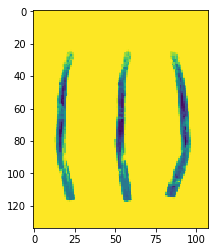

In [3]:
plt.imshow(images[0][:,:])

In [4]:
histograms = []
for i, img in enumerate(images):
    if i % 100 == 0:
        print('.',end='')
    flat = img.flatten()
    foreground_pixels = flat[flat!=254.0]
    hist = np.histogram(foreground_pixels,bins=np.arange(256),density=True)
    histograms.append(hist[0])

...................................................................................................................................

In [5]:
histograms = np.array(histograms)

In [6]:
histograms.shape

(13028, 255)

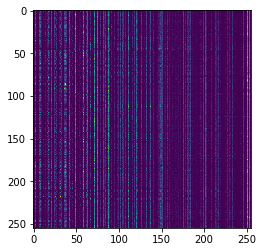

In [7]:
plt.imshow(histograms[:255,:])

In [8]:
histograms = np.expand_dims(np.expand_dims(histograms,1),3)

In [9]:
histograms.shape

(13028, 1, 255, 1)

In [10]:
labels = pd.read_csv("labels.csv",header=0)

In [11]:
print(labels.keys())

Index(['id', 'is_hollow', 'has_blume', 'has_rost_head', 'has_rost_body',
       'is_bended', 'is_violet', 'short', 'thick', 'thin'],
      dtype='object')


In [12]:
selected_labels = ["is_violet","has_rost_body"]
labels = labels[selected_labels]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(histograms, labels, test_size=0.2, random_state=42)

In [14]:
y_test.sum(axis=0)

is_violet         212.0
has_rost_body    1228.0
dtype: float64

In [15]:
len(y_test)-y_test.sum(axis=0)

is_violet        2394.0
has_rost_body    1378.0
dtype: float64

In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [17]:
sample_histogram = x_train[0]
sample_targets = np.array(y_train)[0]

In [18]:
print(sample_histogram.shape)
print(sample_targets.shape)

(1, 255, 1)
(2,)


In [19]:
batch_size = 10
epochs = 500
num_classes = sample_targets.shape[0]
# input image dimensions
img_rows, img_cols = list(sample_histogram.shape)[0:2]
input_shape = [img_rows, img_cols,1] 

In [20]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

model = Sequential()
#model.add(Conv2D(1, kernel_size=(1, 1),activation='relu',input_shape=input_shape))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

x_train shape: (10422, 1, 255, 1)
10422 train samples
2606 test samples


In [21]:
history = model.fit(x_train, y_train.values,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test.values))
score = model.evaluate(x_test, y_test.values, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10422 samples, validate on 2606 samples
Epoch 1/500
10422/10422 [==============================] - 8s 728us/step - loss: 0.4827 - accuracy: 0.7364 - val_loss: 0.4582 - val_accuracy: 0.7738
Epoch 2/500
10422/10422 [==============================] - 7s 648us/step - loss: 0.4379 - accuracy: 0.7871 - val_loss: 0.4644 - val_accuracy: 0.7763
Epoch 3/500
10422/10422 [==============================] - 7s 632us/step - loss: 0.3952 - accuracy: 0.8112 - val_loss: 0.4860 - val_accuracy: 0.7630
Epoch 4/500
10422/10422 [==============================] - 7s 649us/step - loss: 0.3747 - accuracy: 0.8249 - val_loss: 0.3975 - val_accuracy: 0.8033
Epoch 5/500
10422/10422 [==============================] - 7s 647us/step - loss: 0.3680 - accuracy: 0.8285 - val_loss: 0.3722 - val_accuracy: 0.8258
Epoch 6/500
10422/10422 [==============================] - 7s 637us/step - loss: 0.3602 - accuracy: 0.8322 - val_loss: 0.4330 - val_accuracy: 0.7945
Epoch 7/500
10422/10422 [==============================] 

10422/10422 [==============================] - 9s 846us/step - loss: 0.2458 - accuracy: 0.8913 - val_loss: 0.3985 - val_accuracy: 0.8371
Epoch 110/500
10422/10422 [==============================] - 9s 891us/step - loss: 0.2451 - accuracy: 0.8920 - val_loss: 0.4017 - val_accuracy: 0.8415
Epoch 111/500
10422/10422 [==============================] - 9s 892us/step - loss: 0.2448 - accuracy: 0.8923 - val_loss: 0.4328 - val_accuracy: 0.8315
Epoch 112/500
10422/10422 [==============================] - 9s 909us/step - loss: 0.2440 - accuracy: 0.8898 - val_loss: 0.4447 - val_accuracy: 0.8409
Epoch 113/500
10422/10422 [==============================] - 11s 1ms/step - loss: 0.2415 - accuracy: 0.8940 - val_loss: 0.4038 - val_accuracy: 0.8325
Epoch 114/500
10422/10422 [==============================] - 19s 2ms/step - loss: 0.2434 - accuracy: 0.8935 - val_loss: 0.4359 - val_accuracy: 0.7955
Epoch 115/500
10422/10422 [==============================] - 15s 1ms/step - loss: 0.2396 - accuracy: 0.8927 - 

10422/10422 [==============================] - 4s 356us/step - loss: 0.1170 - accuracy: 0.9507 - val_loss: 1.1364 - val_accuracy: 0.8158
Epoch 237/500
10422/10422 [==============================] - 3s 271us/step - loss: 0.1173 - accuracy: 0.9516 - val_loss: 1.0472 - val_accuracy: 0.8108
Epoch 238/500
10422/10422 [==============================] - 3s 323us/step - loss: 0.1149 - accuracy: 0.9529 - val_loss: 1.0001 - val_accuracy: 0.8031
Epoch 239/500
10422/10422 [==============================] - 3s 256us/step - loss: 0.1135 - accuracy: 0.9538 - val_loss: 1.1025 - val_accuracy: 0.8196
Epoch 240/500
10422/10422 [==============================] - 2s 217us/step - loss: 0.1163 - accuracy: 0.9534 - val_loss: 1.1402 - val_accuracy: 0.8254
Epoch 241/500
10422/10422 [==============================] - 2s 221us/step - loss: 0.1171 - accuracy: 0.9525 - val_loss: 1.0070 - val_accuracy: 0.8204
Epoch 242/500
10422/10422 [==============================] - 3s 321us/step - loss: 0.1127 - accuracy: 0.9530

10422/10422 [==============================] - 3s 307us/step - loss: 0.0646 - accuracy: 0.9766 - val_loss: 1.6346 - val_accuracy: 0.8147
Epoch 345/500
10422/10422 [==============================] - 3s 327us/step - loss: 0.0622 - accuracy: 0.9776 - val_loss: 1.7332 - val_accuracy: 0.8041
Epoch 346/500
10422/10422 [==============================] - 4s 390us/step - loss: 0.0626 - accuracy: 0.9776 - val_loss: 1.8137 - val_accuracy: 0.8037
Epoch 347/500
10422/10422 [==============================] - 4s 377us/step - loss: 0.0662 - accuracy: 0.9777 - val_loss: 2.1869 - val_accuracy: 0.8219
Epoch 348/500
10422/10422 [==============================] - 2s 215us/step - loss: 0.0639 - accuracy: 0.9774 - val_loss: 1.8893 - val_accuracy: 0.8145
Epoch 349/500
10422/10422 [==============================] - 3s 275us/step - loss: 0.0600 - accuracy: 0.9785 - val_loss: 1.7288 - val_accuracy: 0.8181
Epoch 350/500
10422/10422 [==============================] - 4s 384us/step - loss: 0.0616 - accuracy: 0.9763

10422/10422 [==============================] - 4s 356us/step - loss: 0.0514 - accuracy: 0.9824 - val_loss: 2.1516 - val_accuracy: 0.8216
Epoch 453/500
10422/10422 [==============================] - 3s 272us/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 2.0558 - val_accuracy: 0.8102
Epoch 454/500
10422/10422 [==============================] - 2s 218us/step - loss: 0.0517 - accuracy: 0.9817 - val_loss: 2.2673 - val_accuracy: 0.8164
Epoch 455/500
10422/10422 [==============================] - 3s 257us/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 2.0746 - val_accuracy: 0.8133
Epoch 456/500
10422/10422 [==============================] - 4s 376us/step - loss: 0.0486 - accuracy: 0.9822 - val_loss: 2.2111 - val_accuracy: 0.8110
Epoch 457/500
10422/10422 [==============================] - 4s 405us/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 2.1261 - val_accuracy: 0.8125
Epoch 458/500
10422/10422 [==============================] - 4s 340us/step - loss: 0.0526 - accuracy: 0.9821

Text(0, 0.5, 'Loss')

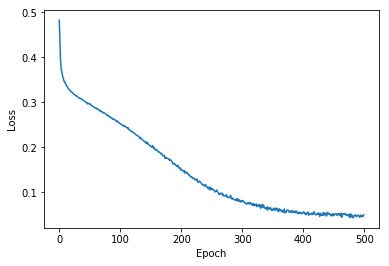

In [43]:
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [179]:
def get_confusion_matrices(y_pred,y_test,bias=False, additional_measures=False):
    #Calculate confusion matrix
    if bias == False:
        bias = .5
    y_pred = y_pred > bias
    y_test = pd.DataFrame(y_test, dtype=np.int32)
    y_pred = np.array(y_pred, dtype=np.int32)
    y_test = pd.DataFrame(y_test)
    false_negatives = np.sum(np.logical_and(y_test == 1,y_pred==0),axis=0)#y_test is 1 while y_pred did not indicate
    false_positives = np.sum(np.logical_and(y_test == 0,y_pred==1),axis=0)#y_test is 0 while y_pred say it was 1
    true_positives = np.sum(np.logical_and(y_test == 1,y_pred==1),axis=0)#both indicate 1
    true_negatives = np.sum(np.logical_and(y_test == 0,y_pred==0),axis=0)#both indicate 0
    summary = pd.DataFrame()
    summary['False positive'] = false_positives
    summary['False negative'] = false_negatives
    summary['True positive'] = true_positives
    summary['True negative'] = true_negatives
    summary = pd.DataFrame(summary)
    #print(summary.sum(axis=1)[0])
    summary_percent = (summary/summary.sum(axis=1)[0])
    if additional_measures:
        #summary_percent['Accuracy'] = summary_percent['True positive'] + summary_percent['True negative']
        summary_percent['Sensitivity'] = summary_percent['True positive']/(summary_percent['True positive']+summary_percent['False negative'])
        summary_percent['Specificity'] = summary_percent['True negative']/(summary_percent['True negative']+summary_percent['False positive'])

    return summary, summary_percent

In [168]:
y_pred = model.predict(x_test)

In [169]:
conf = get_confusion_matrices(y_pred,y_test, False, True)

In [170]:
conf[0]

,False positive,False negative,True positive,True negative
is_violet,92,80,132,2302
has_rost_body,485,360,868,893


In [171]:
conf[1].round(2)

,False positive,False negative,True positive,True negative,Sensitivity,Specificity
is_violet,0.04,0.03,0.05,0.88,0.62,0.96
has_rost_body,0.19,0.14,0.33,0.34,0.71,0.65


In [172]:
conf[1].round(2).to_latex()

'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  False positive &  False negative &  True positive &  True negative &  Sensitivity &  Specificity \\\\\n\\midrule\nis\\_violet     &            0.04 &            0.03 &           0.05 &           0.88 &         0.62 &         0.96 \\\\\nhas\\_rost\\_body &            0.19 &            0.14 &           0.33 &           0.34 &         0.71 &         0.65 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [366]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def roc_characteristic(y_pred,y_test):
    fpr = []
    tpr = []
    biases = []
    for bias in np.linspace(-50,50,1000):
        print(".",end="")
        summary, _ = get_confusion_matrices(y_pred,y_test,bias=np.abs(sigmoid(bias)))
        fpv = summary["False positive"]/(summary["False positive"]+summary["True negative"])
        tpv = summary["True positive"]/(summary["True positive"]+summary["False negative"])
        biases.append(bias)
        fpr.append(fpv)
        tpr.append(tpv)
    return np.array([np.array(fpr), np.array(tpr)])

In [367]:
roc = roc_characteristic(model.predict(x_test), y_test)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [375]:
np.save("roc_color_based.npy",roc)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
roc = np.load("roc_color_based.npy")

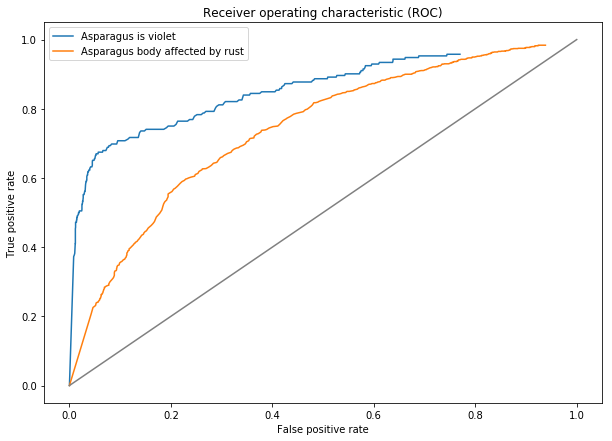

In [2]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(roc[0][:,0],roc[1][:,0], label="Asparagus is violet")
ax.plot(roc[0][:,1],roc[1][:,1], label="Asparagus body affected by rust")
ax.plot([0,1],color = "gray")
ax.legend()

ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')
fig.show()

# Sources & further reading
- https://stackoverflow.com/questions/44164749/how-does-keras-handle-multilabel-classification
- https://math.stackexchange.com/questions/225047/estimate-confidence-interval-for-true-positive-rate-and-false-positive-rate